# Mega Sena da Virada 

Será que os algoritmos conseguem acertar? 

Faremos o uso dos dados dos anos passados. De 1996 a 2018. 22 anos de jogos. 


## 1. Importando as bibliotecas necessárias 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot   as plt
import seaborn as sns

## 2. Lendo o _Dataset_

In [2]:
df = pd.read_csv('sorteios.csv') 
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2278 non-null   int64  
 1   Concurso                  2278 non-null   int64  
 2   Data Sorteio              2278 non-null   object 
 3   1ª Dezena                 2278 non-null   int64  
 4   2ª Dezena                 2278 non-null   int64  
 5   3ª Dezena                 2278 non-null   int64  
 6   4ª Dezena                 2278 non-null   int64  
 7   5ª Dezena                 2278 non-null   int64  
 8   6ª Dezena                 2278 non-null   int64  
 9   Arrecadacao_Total         2278 non-null   object 
 10  Ganhadores_Sena           2278 non-null   int64  
 11  Cidade                    392 non-null    object 
 12  UF                        678 non-null    object 
 13  Rateio_Sena               2278 non-null   object 
 14  Ganhador

,Id,Concurso,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,6ª Dezena,Ganhadores_Sena,Ganhadores_Quina,Ganhadores_Quadra,Unnamed: 22
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,0.0
mean,1139.500000,1046.037752,30.441176,29.809482,30.546971,30.689640,30.054434,29.757682,0.774802,172.262511,9964.825724,NaN
std,657.746278,595.929308,17.439520,17.360566,17.518250,17.225998,17.236672,17.404741,2.127623,461.009424,19591.148738,NaN
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,6.000000,683.000000,NaN
25%,570.250000,529.000000,15.000000,15.000000,15.000000,16.000000,15.000000,15.000000,0.000000,52.000000,3994.250000,NaN
50%,1139.500000,1056.500000,31.000000,30.000000,30.000000,31.000000,30.500000,30.000000,0.000000,83.000000,5764.500000,NaN
75%,1708.750000,1560.000000,46.000000,45.000000,46.000000,45.000000,45.000000,45.000000,1.000000,136.750000,8816.250000,NaN
max,2278.000000,2062.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,17.000000,4862.000000,173428.000000,NaN


### 2.1 Verificando se alguma vez as dezenas se repetiram na mesma ordem

In [4]:
df.groupby(['1ª Dezena','2ª Dezena', '3ª Dezena', '4ª Dezena', '5ª Dezena', '6ª Dezena']).size().sort_values(ascending=False)

1ª Dezena  2ª Dezena  3ª Dezena  4ª Dezena  5ª Dezena  6ª Dezena
6          37         34         10         3          17           17
56         45         13         33         38         1            15
36         54         3          31         15         48            7
31         2          51         42         18         56            6
5          24         51         22         11         53            6
                                                                    ..
21         52         34         26         2          32            1
           48         33         1          56         17            1
           47         40         52         30         20            1
           46         6          22         13         31            1
60         58         49         32         20         34            1
Length: 2062, dtype: int64

Até 2018, nunca tivemos um jogo repetido com as dezenas na mesma ordem.

### As 6 dezenas mais sorteadas em todos os jogos


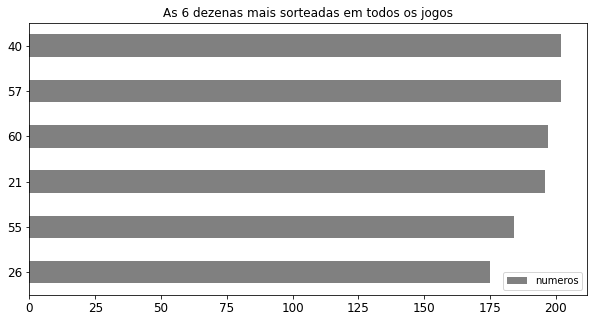

In [16]:
dezenas = pd.DataFrame(df['1ª Dezena'].tolist() + df['2ª Dezena'].tolist() + df['3ª Dezena'].tolist() + df['4ª Dezena'].tolist() + df['5ª Dezena'].tolist() + df['6ª Dezena'].tolist(), columns=['numeros'])
dezenas['numeros'].value_counts().sort_values(ascending=True).head(6).plot(kind='barh', title='As 6 dezenas mais sorteadas em todos os jogos', figsize=(10,5), fontsize=12, legend=True, color='gray')

## 3. Preparando os dados para o modelo

Atributos selecionados: 1ª, 2ª, 3ª, 4ª, 5ª e 6ª dezena e ganhadores

In [21]:
final_dataset = df[['1ª Dezena','2ª Dezena', '3ª Dezena', '4ª Dezena', '5ª Dezena', '6ª Dezena', 'Ganhadores_Sena']] 
final_dataset.columns = map(str.lower, final_dataset.columns)
final_dataset.head(6)

,1ª dezena,2ª dezena,3ª dezena,4ª dezena,5ª dezena,6ª dezena,ganhadores_sena
0,41,5,4,52,30,33,0
1,9,39,37,49,43,41,1
2,36,30,10,11,29,47,2
3,36,30,10,11,29,47,2
4,6,59,42,27,1,5,0
5,1,19,46,6,16,2,0


In [ ]:
# todo jogo que tiver mais de um ganhador deixamos como o numeor 1
final_dataset.loc[final_dataset['ganhadores_sena'] > 1, 'ganhadores_sena'] = 1

## 4. Modelo de Rede Neural

In [174]:
from keras.models  import Sequential
from keras.layers  import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.regularizers import l2

In [171]:
np.random.seed(33)

In [181]:
features = final_dataset.iloc[:,0:6]
target   = final_dataset.iloc[:,6]

input_train, input_test, output_train, output_test = train_test_split(features, target, test_size=0.25, random_state=33)

In [231]:
# Neural Network model 
modelo = Sequential()
modelo.add(Dense(64, input_dim=6, activation='relu'))
modelo.add(Dense(32, activation='relu'))
modelo.add(Dropout(0.1))
modelo.add(Dense(1, activity_regularizer=l2(0.002)))
modelo.add(Dense(1, activation='sigmoid'))
modelo.summary()
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
opt = keras.optimizers.Adam(learning_rate=0.001)
modelo.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_124 (Dense)           (None, 64)                448       
                                                                 
 dense_125 (Dense)           (None, 32)                2080      
                                                                 
 dropout_26 (Dropout)        (None, 32)                0         
                                                                 
 dense_126 (Dense)           (None, 1)                 33        
                                                                 
 dense_127 (Dense)           (None, 1)                 2         
                                                                 
Total params: 2,563
Trainable params: 2,563
Non-trainable params: 0
_________________________________________________________________


In [232]:
#Treinamento 
history = modelo.fit(input_train, output_train, epochs=100, batch_size=32, callbacks=[callback],
                     validation_data=(input_test, output_test), shuffle=True)

Epoch 1/100
54/54 [==============================] - 1s 7ms/step - loss: 2.1216 - accuracy: 0.6001 - val_loss: 0.8560 - val_accuracy: 0.6842
Epoch 2/100
54/54 [==============================] - 0s 3ms/step - loss: 1.1378 - accuracy: 0.6107 - val_loss: 0.6941 - val_accuracy: 0.6702
Epoch 3/100
54/54 [==============================] - 0s 3ms/step - loss: 0.8362 - accuracy: 0.6206 - val_loss: 0.6659 - val_accuracy: 0.6789
Epoch 4/100
54/54 [==============================] - 0s 3ms/step - loss: 0.7168 - accuracy: 0.6347 - val_loss: 0.6428 - val_accuracy: 0.6737
Epoch 5/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6570 - accuracy: 0.6475 - val_loss: 0.6323 - val_accuracy: 0.7053
Epoch 6/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6409 - accuracy: 0.6569 - val_loss: 0.6335 - val_accuracy: 0.6825
Epoch 7/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6208 - accuracy: 0.6838 - val_loss: 0.6133 - val_accuracy: 0.7123
Epoch 8/100
5

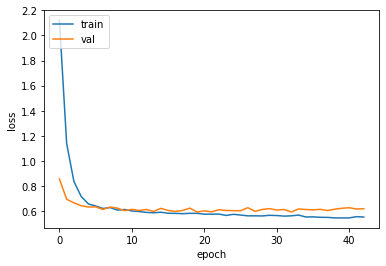

In [233]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Fazendo a predição 

### Escolhendo as dezenas 

In [236]:
numero_sorteio = [[7, 10, 13, 21, 33, 60]]
num_sorteio = pd.DataFrame(numero_sorteio)

### Predição

In [237]:
predict_class = modelo.predict(num_sorteio)
print("1 = Tem chance de ganhar \n0 = Não tem chance de ganhar")
print("Previsão Modelo: ",predict_class[0][0])

1/1 [==============================] - 0s 40ms/step
1 = Tem chance de ganhar 
0 = Não tem chance de ganhar
Previsão Modelo:  0.3943354
